In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/train_iterative_imputer_cloud_coverage.csv')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698675 entries, 0 to 698674
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   wind_direction      698675 non-null  float64
 1   building_id         698675 non-null  int64  
 2   timestamp           698675 non-null  object 
 3   meter_reading       698675 non-null  float64
 4   primary_use         698675 non-null  object 
 5   square_feet         698675 non-null  int64  
 6   year_built          698675 non-null  int64  
 7   cloud_coverage      698675 non-null  float64
 8   air_temperature     698675 non-null  float64
 9   dew_temperature     698675 non-null  float64
 10  sea_level_pressure  698675 non-null  float64
 11  wind_speed          698675 non-null  float64
 12  hour                698675 non-null  float64
 13  month               698675 non-null  float64
 14  precip_depth_1_hr   698675 non-null  float64
dtypes: float64(10), int64(3), object(2

In [6]:
df.isnull().sum()

wind_direction        0
building_id           0
timestamp             0
meter_reading         0
primary_use           0
square_feet           0
year_built            0
cloud_coverage        0
air_temperature       0
dew_temperature       0
sea_level_pressure    0
wind_speed            0
hour                  0
month                 0
precip_depth_1_hr     0
dtype: int64

/var/folders/6q/pmrz1w_935lc5f08sxm0smhm0000gn/T/ipykernel_87024/3576166653.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Data shape: (698675, 15)

Numeric columns:
['wind_direction', 'building_id', 'meter_reading', 'square_feet', 'year_built', 'cloud_coverage', 'air_temperature', 'dew_temperature', 'sea_level_pressure', 'wind_speed', 'hour', 'month', 'precip_depth_1_hr']

Categorical columns:
['primary_use']


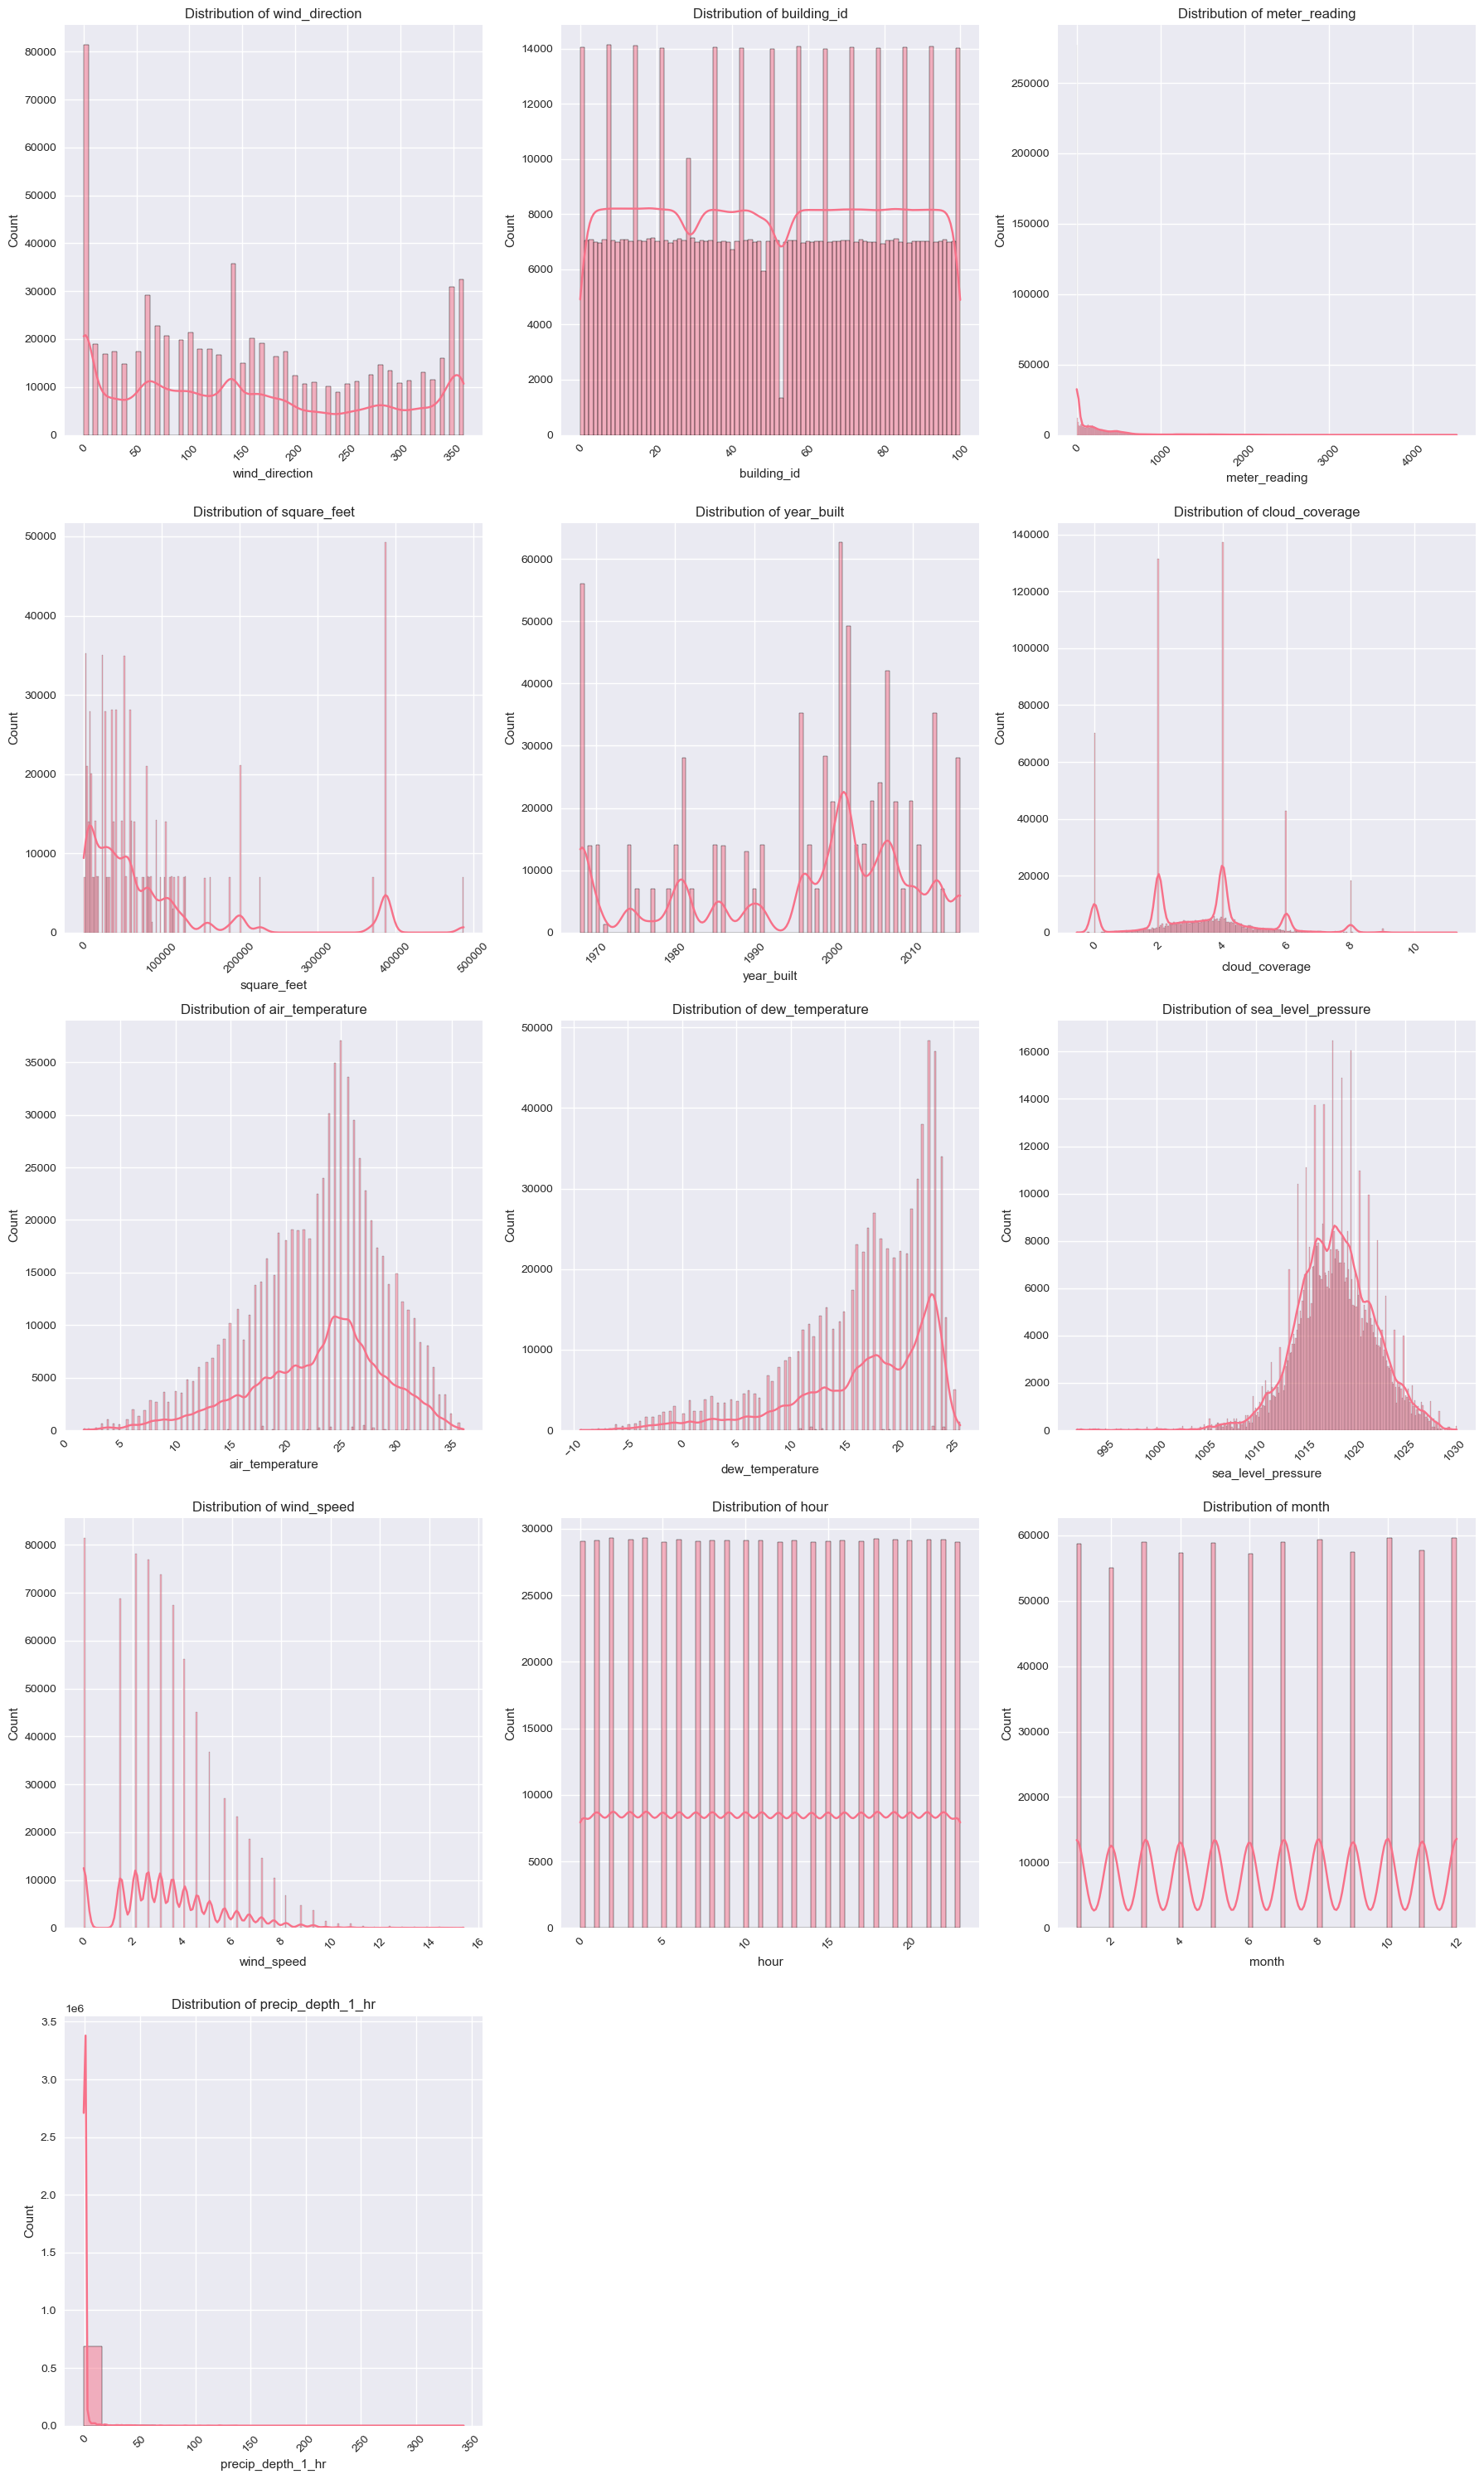

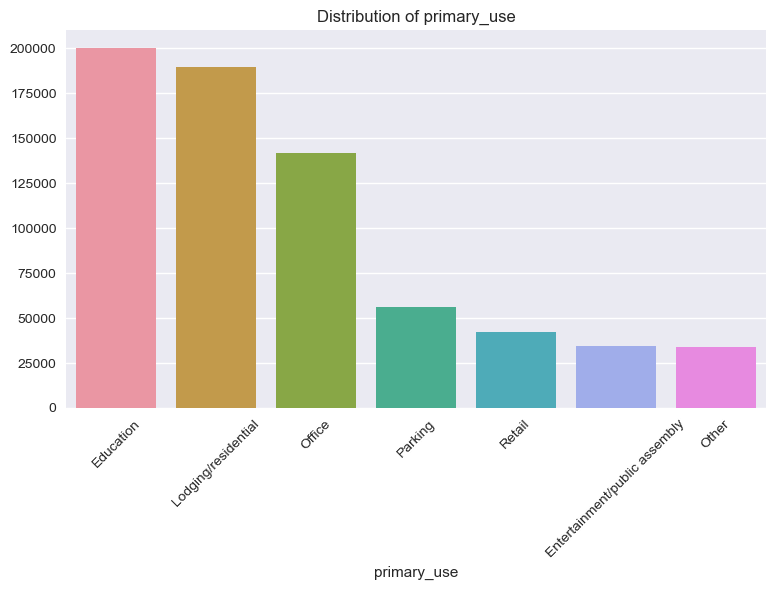

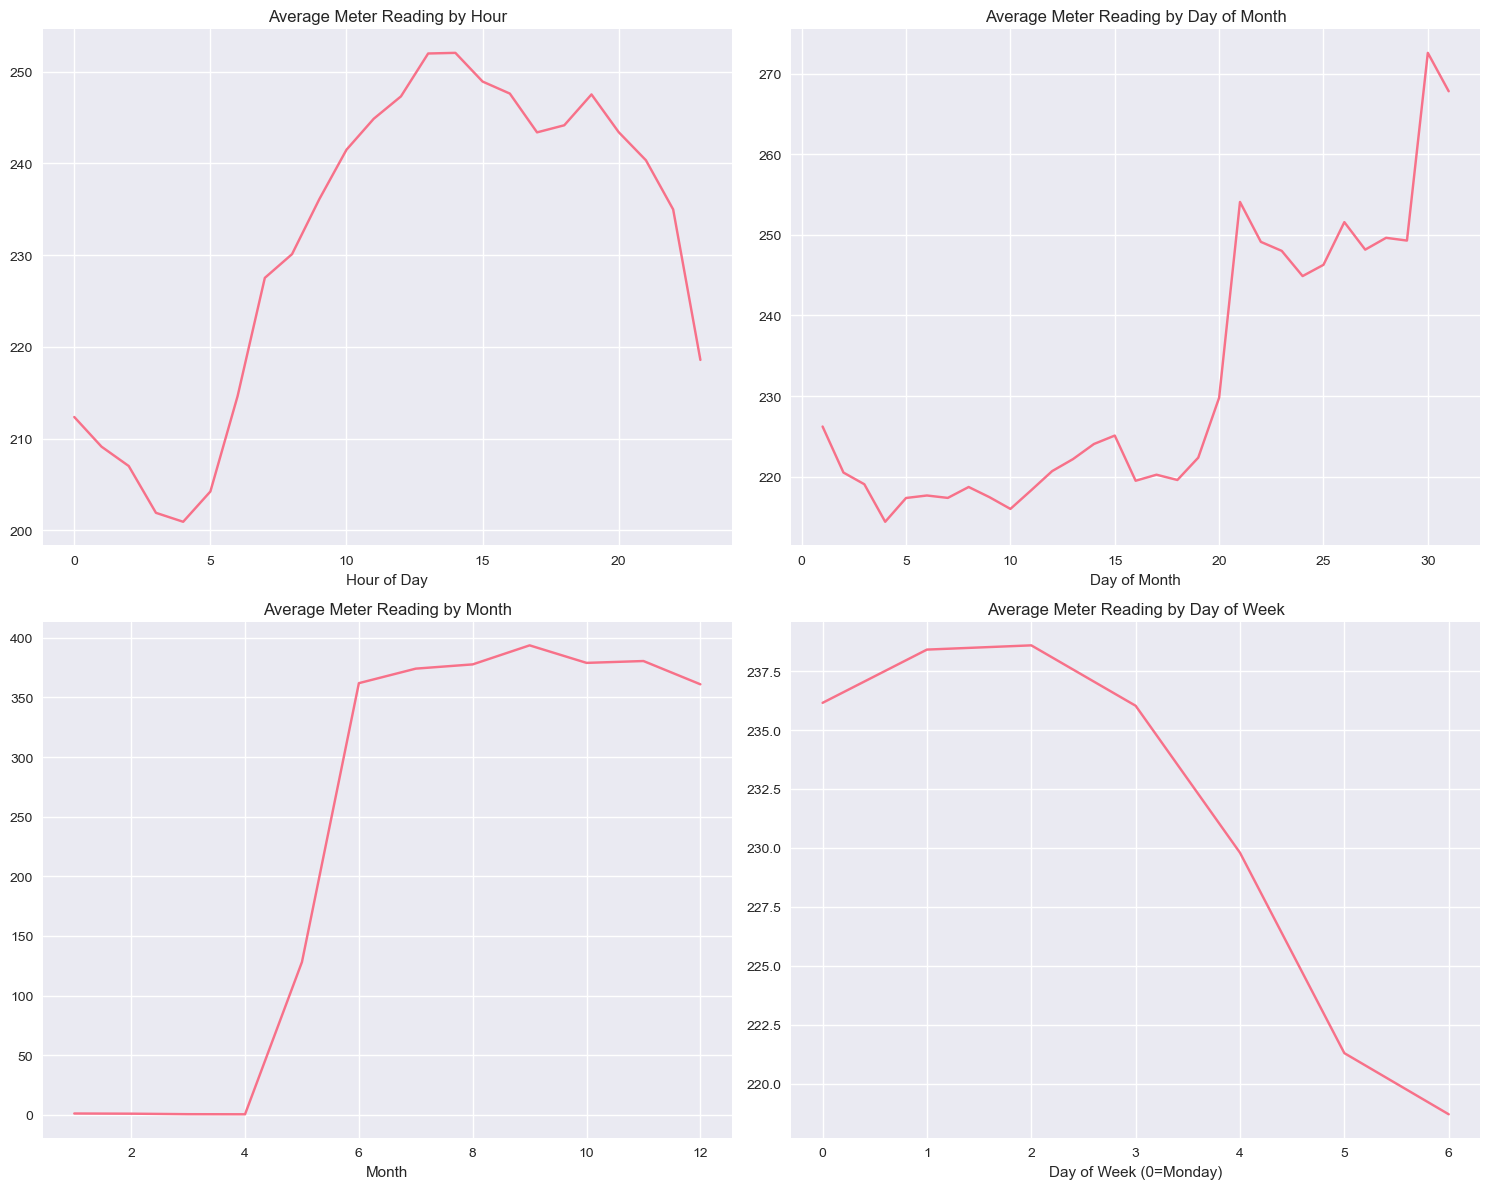

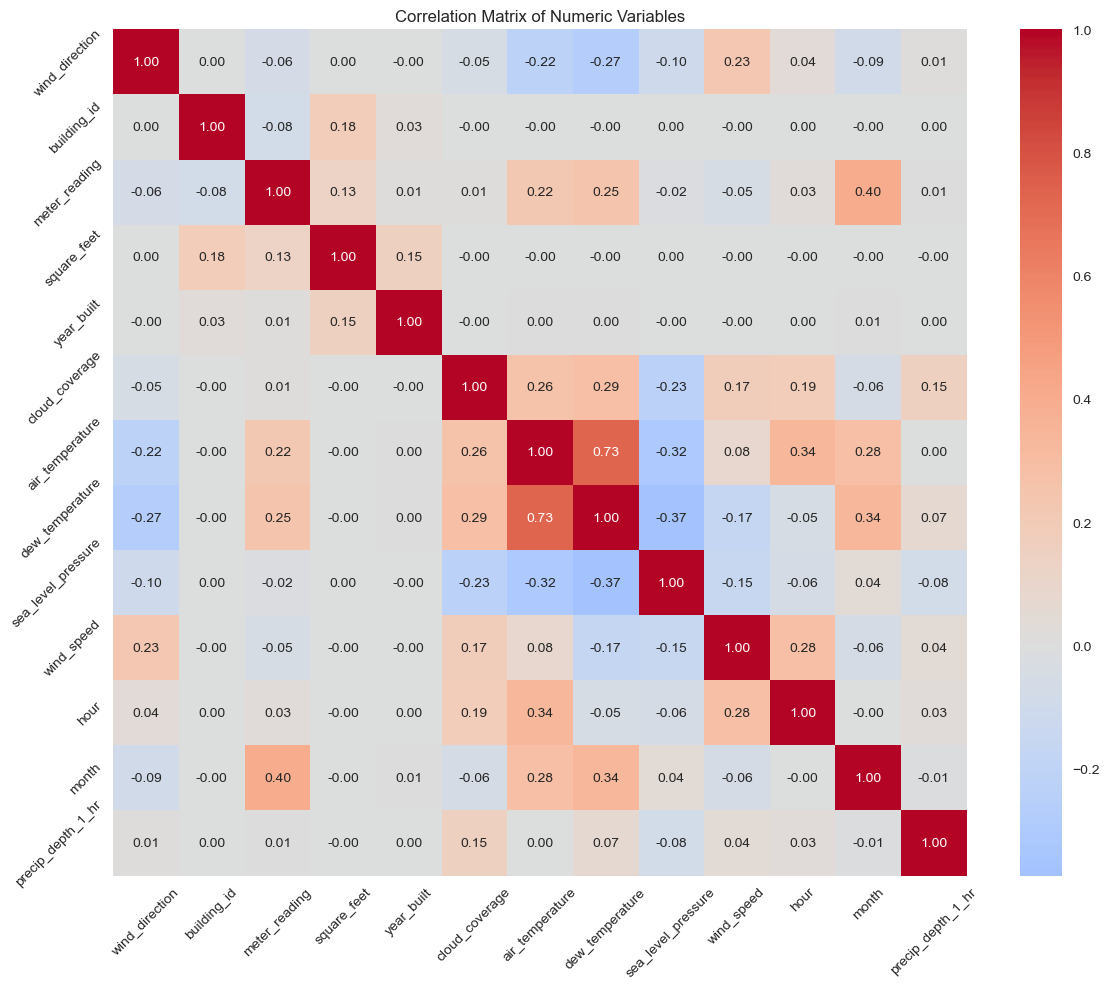

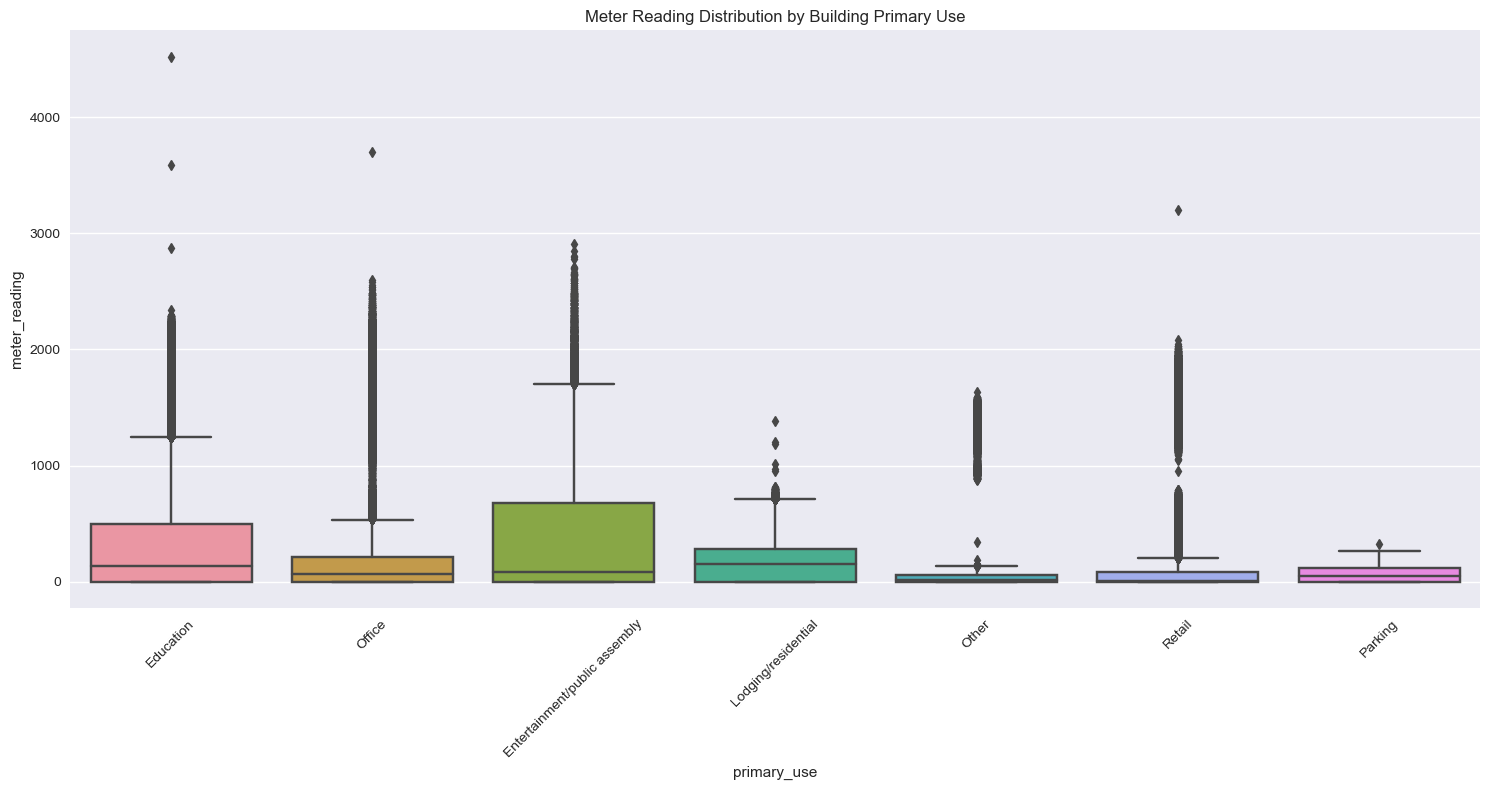

In [10]:


plt.style.use('seaborn')
sns.set_palette('husl')

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

df = pd.read_csv('data/train_iterative_imputer_cloud_coverage.csv', parse_dates=['timestamp'])
print(f"Data shape: {df.shape}")

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


print("\nNumeric columns:")
print(numeric_cols)
print("\nCategorical columns:")
print(categorical_cols)

n_numeric = len(numeric_cols)
rows = (n_numeric + 2) // 3  # 3 columns per row
fig = plt.figure(figsize=(18, 6*rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

n_cat = len(categorical_cols)
if n_cat > 0:
    rows = (n_cat + 1) // 2  # 2 columns per row
    fig = plt.figure(figsize=(15, 6*rows))
    
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(rows, 2, i)
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Hourly pattern
df['hour'] = df['timestamp'].dt.hour
hourly_avg = df.groupby('hour')['meter_reading'].mean()
axes[0,0].plot(hourly_avg.index, hourly_avg.values)
axes[0,0].set_title('Average Meter Reading by Hour')
axes[0,0].set_xlabel('Hour of Day')

# Daily pattern
df['day'] = df['timestamp'].dt.day
daily_avg = df.groupby('day')['meter_reading'].mean()
axes[0,1].plot(daily_avg.index, daily_avg.values)
axes[0,1].set_title('Average Meter Reading by Day of Month')
axes[0,1].set_xlabel('Day of Month')

# Monthly pattern
df['month'] = df['timestamp'].dt.month
monthly_avg = df.groupby('month')['meter_reading'].mean()
axes[1,0].plot(monthly_avg.index, monthly_avg.values)
axes[1,0].set_title('Average Meter Reading by Month')
axes[1,0].set_xlabel('Month')

# Day of week pattern
df['dayofweek'] = df['timestamp'].dt.dayofweek
dow_avg = df.groupby('dayofweek')['meter_reading'].mean()
axes[1,1].plot(dow_avg.index, dow_avg.values)
axes[1,1].set_title('Average Meter Reading by Day of Week')
axes[1,1].set_xlabel('Day of Week (0=Monday)')

plt.tight_layout()
plt.show()

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='primary_use', y='meter_reading')
plt.xticks(rotation=45)
plt.title('Meter Reading Distribution by Building Primary Use')
plt.tight_layout()
plt.show()

In [11]:
df.columns

Index(['wind_direction', 'building_id', 'timestamp', 'meter_reading',
       'primary_use', 'square_feet', 'year_built', 'cloud_coverage',
       'air_temperature', 'dew_temperature', 'sea_level_pressure',
       'wind_speed', 'hour', 'month', 'precip_depth_1_hr', 'day', 'dayofweek'],
      dtype='object')